In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BankNotes.csv to BankNotes.csv


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "BankNotes.csv" with length 46441 bytes


In [4]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['BankNotes.csv'].decode('utf-8')))
df.head(5)

variace  skewness  curtosis  entropy  class
0  3.62160    8.6661   -2.8073 -0.44699      0
1  4.54590    8.1674   -2.4586 -1.46210      0
2  3.86600   -2.6383    1.9242  0.10645      0
3  3.45660    9.5228   -4.0112 -3.59440      0
4  0.32924   -4.4552    4.5718 -0.98880      0

In [5]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [0]:
import seaborn as sns

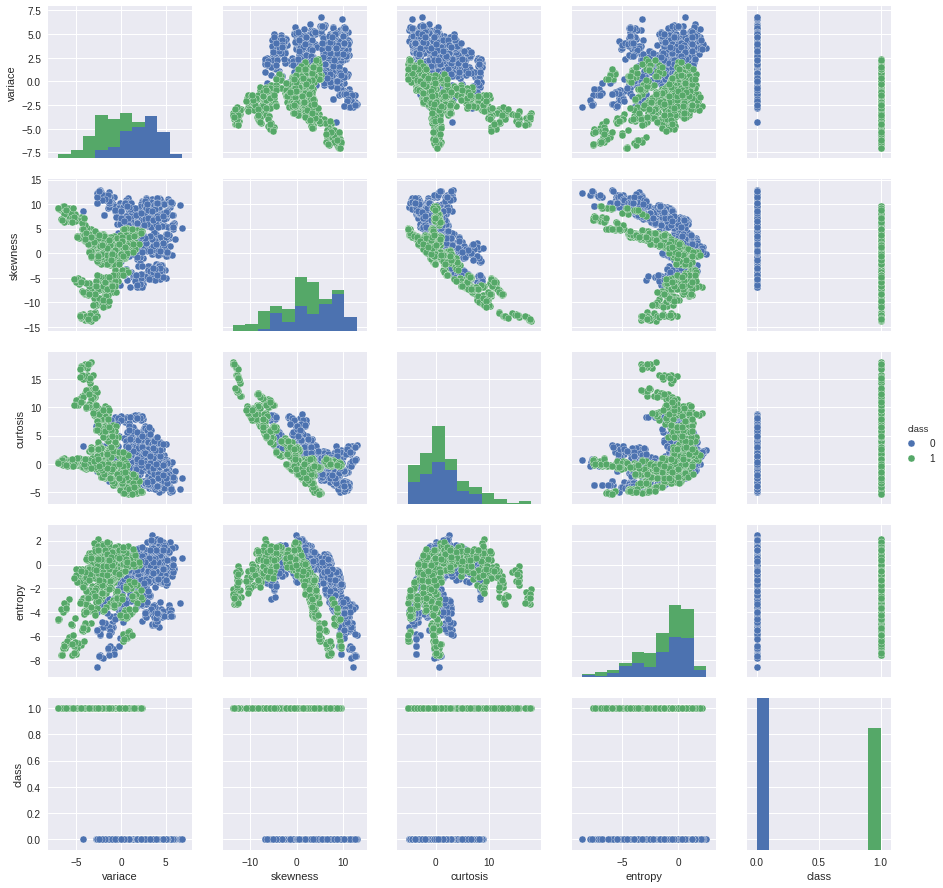

In [7]:
sns.pairplot(df,hue='class')

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [0]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [10]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.99126638, 0.99124726, 0.99562363])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [12]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [13]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=20)
result = model.evaluate(X_test, y_test)

Epoch 1/20
960/960 [==============================] - 0s 504us/step - loss: 0.8916 - acc: 0.4406
Epoch 2/20
960/960 [==============================] - 0s 31us/step - loss: 0.8104 - acc: 0.4990
Epoch 3/20
960/960 [==============================] - 0s 35us/step - loss: 0.7409 - acc: 0.5698
Epoch 4/20
960/960 [==============================] - 0s 31us/step - loss: 0.6816 - acc: 0.6000
Epoch 5/20
960/960 [==============================] - 0s 34us/step - loss: 0.6308 - acc: 0.6500
Epoch 6/20
960/960 [==============================] - 0s 33us/step - loss: 0.5874 - acc: 0.6865
Epoch 7/20
960/960 [==============================] - 0s 36us/step - loss: 0.5501 - acc: 0.7448
Epoch 8/20
960/960 [==============================] - 0s 32us/step - loss: 0.5180 - acc: 0.8010
Epoch 9/20
960/960 [==============================] - 0s 32us/step - loss: 0.4903 - acc: 0.8302
Epoch 10/20
960/960 [==============================] - 0s 34us/step - loss: 0.4663 - acc: 0.8458
Epoch 11/20
960/960 [=================

In [14]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.head()

acc      loss
0  0.440625  0.891642
1  0.498958  0.810374
2  0.569792  0.740876
3  0.600000  0.681556
4  0.650000  0.630825

Text(0.5, 1.0, 'Test accuracy: 93.4 %')

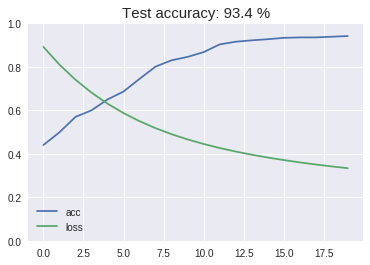

In [15]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

In [0]:
## Learning Rates

In [50]:
dflist = []
a=pd.DataFrame(columns=('acc','loss'))

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    b=pd.DataFrame(h.history, index=h.epoch)
    a=a.append(b,ignore_index=True)

print(a)

        acc      loss
0  0.408333  1.031386
1  0.781250  0.523020
2  0.915625  0.334691
3  0.898958  0.289377


In [52]:
dflist = []

batch_sizes = [16, 32, 64, 128]
a1=pd.DataFrame(columns=('acc','loss'))

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    b=pd.DataFrame(h.history, index=h.epoch)
    a1=a1.append(b,ignore_index=True)
    #dflist.append(pd.DataFrame(h.history, index=h.epoch))
print(a1)

        acc      loss
0  0.340625  1.242634
1  0.639583  0.648173
2  0.715625  0.580944
3  0.461458  1.051078


In [0]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [0]:
dflist

[        acc      loss
 0  0.417708  1.163465,    acc      loss
 0  0.8  0.451862,         acc      loss
 0  0.232292  1.457496,         acc      loss
 0  0.522917  0.891855]